<div style="font-family: 'TeX Gyre Termes', serif; color: black; font-size: 18px;">

### **Deconvolution Response to Noise Levels**  
**Author: Ramesh Bhatta, CIS, RIT**  

This code is just the visualization of the outcomes of the experiments on how to choose the best "boosting factor" for deconvolution in case of noisy waveforms. For more details and information please see the pptx. files uploaded within the same directory.
</div>


In [7]:
## importing libraries

import numpy as np
import matplotlib.pyplot as plt

# # Define text sizes
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

# Apply text size settings
plt.rc('font', size=SMALL_SIZE)          # Default font size
plt.rc('axes', titlesize=MEDIUM_SIZE)   # Axis title font size
plt.rc('axes', labelsize=MEDIUM_SIZE)   # Axis labels font size
plt.rc('xtick', labelsize=SMALL_SIZE)   # X-axis tick label font size
plt.rc('ytick', labelsize=SMALL_SIZE)   # Y-axis tick label font size
plt.rc('legend', fontsize=SMALL_SIZE)   # Legend font size
plt.rc('figure', titlesize=BIGGER_SIZE) # Figure title font size

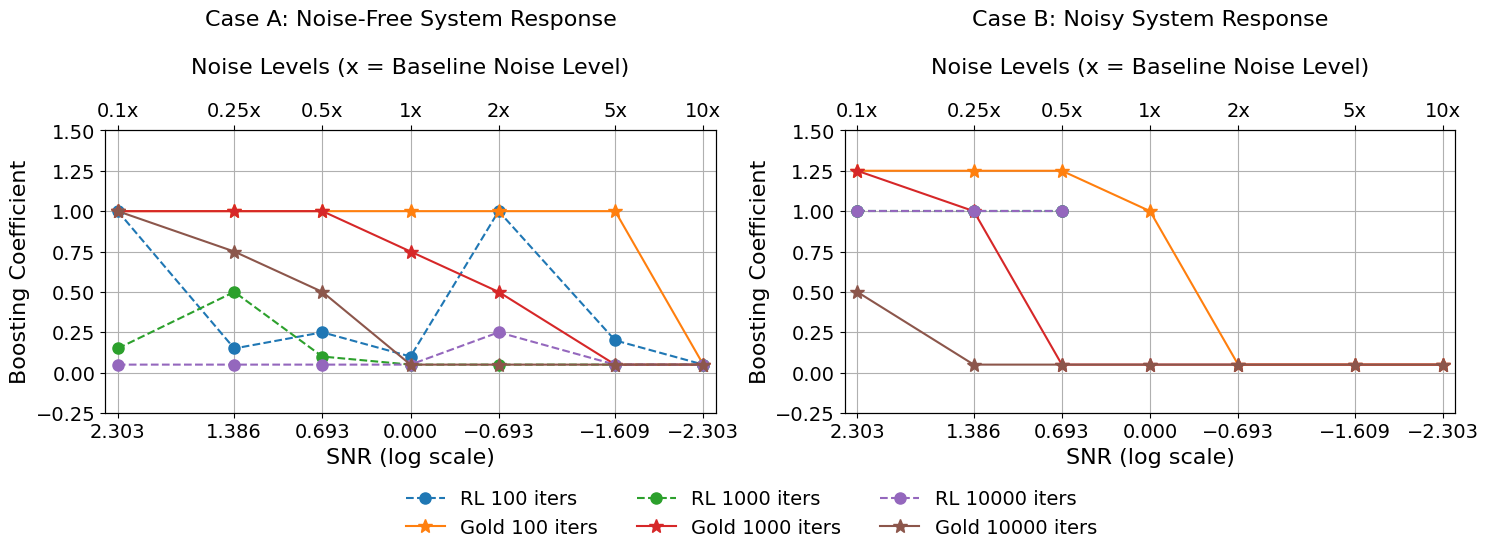

In [9]:
# Data
noise_levels = [10, 4, 2, 1, 0.5, 0.2, 0.1]  # Noise levels
noise_levels = np.log(noise_levels)
iterations = [100, 1000, 10000]  # Iterations tested

# Case A: Noisy waveforms + Noise free system response data
noisyRL_bc_caseA = [
    [1.0, 0.15, 0.05],
    [0.15, 0.5, 0.05],
    [0.25, 0.10, 0.05],
    [0.10, 0.05, 0.05],
    [1.0, 0.05, 0.25],
    [0.20, 0.05, 0.05],
    [0.05, 0.05, 0.05]
]
noisygold_bc_caseA = [
    [1.0, 1.0, 1.0],
    [1.0, 1.0, 0.75],
    [1.0, 1.0, 0.5],
    [1.0, 0.75, 0.05],
    [1.0, 0.5, 0.05],
    [1.0, 0.05, 0.05],
    [0.05, 0.05, 0.05]
]

# Case B: Noisy waveforms + Noisy system response data
noisyRL_bc_caseB = [
    [1.0, 1.0, 1.0],
    [1.0, 1.0, 1.0],
    [1.0, 1.0, 1.0],
    [np.nan, np.nan, np.nan],
    [np.nan, np.nan, np.nan],
    [np.nan, np.nan, np.nan],
    [np.nan, np.nan, np.nan]
]
noisygold_bc_caseB = [
    [1.25, 1.25, 0.5],
    [1.25, 1.0, 0.05],
    [1.25, 0.05, 0.05],
    [1.0, 0.05, 0.05],
    [0.05, 0.05, 0.05],
    [0.05, 0.05, 0.05],
    [0.05, 0.05, 0.05]
]

colors = ['red', 'green']

# Plotting function
def plot_boosting_factors(noise_levels, iterations, rl_data, gold_data, title, ax, include_legend=False):
    rl_data = np.array(rl_data)
    gold_data = np.array(gold_data)

    label_set = set()  # Initialize label set to track duplicate labels
    for i, iter_count in enumerate(iterations):
        rl_label = f'RL {iter_count} iters'
        gold_label = f'Gold {iter_count} iters'

        # Plot only if the label is not already added to the label_set
        if rl_label not in label_set:
            ax.plot(noise_levels, rl_data[:, i], label=rl_label, marker='o', markersize=8, linestyle='dashed', linewidth=1.5)
            label_set.add(rl_label)
        
        if gold_label not in label_set:
            ax.plot(noise_levels, gold_data[:, i], label=gold_label, marker='*', markersize=10, linewidth=1.5)
            label_set.add(gold_label)

    ax.set_title(title)
    ax.set_xlabel("SNR (log scale)")
    ax.set_ylabel("Boosting Coefficient")
    ax.set_ylim(-0.25, 1.5)
    ax.grid(True)
    ax.set_xticks(noise_levels)
    ax.set_xlim(max(noise_levels)+0.1, min(noise_levels)-0.1)

    # Create a secondary x-axis above the plot
    nl = [0.1, 0.25, 0.5, 1, 2, 5, 10]
    noise_str = ['0.1x', '0.25x', '0.5x', '1x', '2x', '5x', '10x']
    ax2 = ax.twiny()
    ax2.set_xlim(ax.get_xlim())  # Same x-range as the main axis
    ax2.set_xticks(noise_levels)  # Use the same ticks
    ax2.set_xticklabels(noise_str)  
    ax2.set_xlabel('Noise Levels (x = Baseline Noise Level)\n')

    # Only include legend for the first plot (Case A)
    # if include_legend:
        # ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), frameon=False, ncol=3)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)

# Plot for Case A 
plot_boosting_factors(noise_levels, iterations, noisyRL_bc_caseA, noisygold_bc_caseA, 
                      "Case A: Noise-Free System Response\n", axes[0], include_legend=True)

# Plot for Case B
plot_boosting_factors(noise_levels, iterations, noisyRL_bc_caseB, noisygold_bc_caseB, 
                      "Case B: Noisy System Response\n", axes[1], include_legend=False)

# Add a single legend below both plots for Case A 
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center', ncol=3, bbox_to_anchor=(0.5, -0.05), frameon=False)

# Final adjustments
plt.tight_layout()
plt.show()
